In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [51]:
family = pd.read_csv('Data/familyxx.csv')
family["family_id"] = family["HHX"] + family["SRVY_YR"] + family["FMX"]
family.head()

person = pd.read_csv('Data/personsx.csv')
person["family_id"] = person["HHX"] + person["SRVY_YR"] + person["FMX"]
person.head()

df = person.merge(family, on = 'family_id', how='inner')
df

,FPX,AGE_CHG,INTV_QRT,SEX,NOWAF,FSPOUS2,COHAB1,COHAB2,FCOHAB3,ASTATFLG,...,COVCONF,FHICOST,FMEDBILL,FMEDBPAY,FMEDBNOP,FSAF,FHICOVCT,FHICOVYN,FPRCOOH,FHIEBCCT
0,1,NaN,1,2,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1,2,2,NaN,2,1,1,NaN,NaN
1,1,NaN,1,2,2.0,2.0,NaN,NaN,NaN,2.0,...,4.0,2,1,1,1.0,2,3,1,2.0,3.0
2,2,NaN,1,1,2.0,1.0,NaN,NaN,NaN,0.0,...,4.0,2,1,1,1.0,2,3,1,2.0,3.0
3,3,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2,1,1,1.0,2,3,1,2.0,3.0
4,1,NaN,1,1,2.0,2.0,NaN,NaN,NaN,1.0,...,1.0,2,2,2,NaN,1,4,1,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73728,1,NaN,4,2,2.0,NaN,NaN,NaN,NaN,1.0,...,1.0,1,2,2,NaN,2,1,1,NaN,1.0
73729,1,NaN,4,2,2.0,NaN,NaN,NaN,NaN,1.0,...,4.0,5,1,1,2.0,2,1,1,2.0,1.0
73730,1,NaN,4,2,2.0,2.0,NaN,NaN,NaN,1.0,...,2.0,2,2,2,NaN,2,2,1,2.0,2.0
73731,2,NaN,4,1,NaN,1.0,NaN,NaN,NaN,2.0,...,2.0,2,2,2,NaN,2,2,1,2.0,2.0


In [52]:
# for checking number of null values
for i in df.columns:
    if(df[i].isnull().sum() > 0):
        df = df.drop([i], axis=1)

In [53]:
df = df[df['FHICOST'] < 7]

X = df[['FHICOST', 'FHICOVCT']]

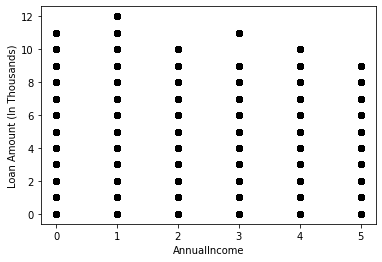

In [54]:
#Visualise data points
plt.scatter(X['FHICOST'],X['FHICOVCT'],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

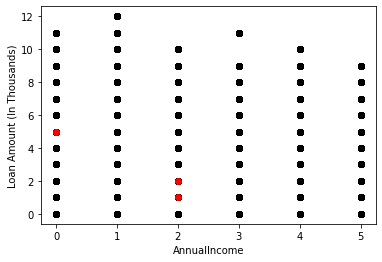

In [55]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X['FHICOST'],X['FHICOVCT'],c='black')
plt.scatter(Centroids['FHICOST'],Centroids['FHICOVCT'],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [56]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["FHICOST"]-row_d["FHICOST"])**2
            d2=(row_c["FHICOVCT"]-row_d["FHICOVCT"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["FHICOVCT","FHICOST"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['FHICOVCT'] - Centroids['FHICOVCT']).sum() + (Centroids_new['FHICOST'] - Centroids['FHICOST']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["FHICOVCT","FHICOST"]]

<ipython-input-56-2b582f578180>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-56-2b582f578180>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


0.5818348059855274
1.4797070261992256
0.5476385740392031
0.14479374725329297
0.0


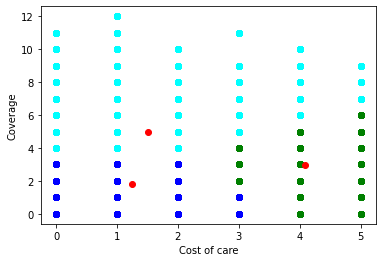

In [57]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["FHICOST"],data["FHICOVCT"],c=color[k])
plt.scatter(Centroids["FHICOST"],Centroids["FHICOVCT"],c='red')
plt.xlabel('Cost of care')
plt.ylabel('Coverage')
plt.show()